In [165]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Import data

In [167]:
#btc options data
df=pd.read_csv('data/btc_data.csv', sep=",", index_col=0)

#df.drop(columns=['Unnamed: 0', 'interest_rate'], inplace=True)


In [168]:
df

,best_bid_amount,best_ask_amount,bid_iv,ask_iv,underlying_index,underlying_price,mark_iv,best_bid_price,best_ask_price,open_interest,...,greeks.gamma,greeks.delta,stats.volume_usd,stats.volume,stats.price_change,stats.low,stats.high,settlement_period,Expiration Date,Strike Price
0,0.0,0.0,0.0,0.00,BTC-3MAY24,59330.12,100.00,0.000,0.0000,125.0,...,0.0,1.00000,402682.41,18.0,0.0000,0.3850,0.3850,week,3MAY24,35000
2,0.0,0.0,0.0,0.00,BTC-3MAY24,59329.29,100.00,0.000,0.0000,31.0,...,0.0,1.00000,277903.56,16.0,-6.6667,0.2800,0.3000,week,3MAY24,40000
3,0.0,13.4,0.0,513.66,BTC-3MAY24,59329.29,100.00,0.000,0.0001,10.4,...,0.0,0.00000,40.17,6.8,0.0000,0.0001,0.0001,week,3MAY24,40000
4,0.0,10.0,0.0,465.65,BTC-3MAY24,59327.17,100.00,0.000,0.2425,35.0,...,0.0,1.00000,209329.77,24.0,146.9136,0.0810,0.2000,week,3MAY24,45000
5,0.0,10.0,0.0,0.00,BTC-3MAY24,59327.17,100.00,0.000,0.0001,10.0,...,0.0,0.00000,0.00,0.0,NaN,NaN,NaN,week,3MAY24,45000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,0.0,0.0,0.0,0.00,BTC-28MAR25,58623.87,72.91,0.000,0.0000,162.5,...,0.0,-0.89726,0.00,0.0,NaN,NaN,NaN,month,28MAR25,180000
1026,0.0,0.0,0.0,0.00,BTC-28MAR25,58623.87,74.71,0.000,0.0000,0.0,...,0.0,0.09777,0.00,0.0,NaN,NaN,NaN,month,28MAR25,190000
1027,100.0,0.0,0.0,0.00,BTC-28MAR25,58626.29,74.71,0.005,0.0000,0.0,...,0.0,-0.90222,12294393.96,100.0,10.6840,1.9754,2.2445,month,28MAR25,190000
1028,0.0,0.0,0.0,0.00,BTC-28MAR25,58626.29,75.47,0.000,0.0000,44.5,...,0.0,0.08925,0.00,0.0,NaN,NaN,NaN,month,28MAR25,200000


### Extract Expiration date and strike price

In [169]:
import pandas as pd
import re

# Define a function to extract expiration date and strike price
def extract_details(instrument_name):
    match = re.match(r"BTC-(\d+[A-Z]{3}\d+)-(\d+)-[CP]", instrument_name)
    if match:
        expiration_date = match.group(1)
        strike_price = match.group(2)
        return expiration_date, strike_price
    return None, None

# Apply the function to your data
df['Expiration Date'], df['Strike Price'] = zip(*df['instrument_name'].apply(extract_details))

# Check the updated DataFrame
print(df[['instrument_name', 'Expiration Date', 'Strike Price']])


           instrument_name Expiration Date Strike Price
0       BTC-3MAY24-35000-C          3MAY24        35000
2       BTC-3MAY24-40000-C          3MAY24        40000
3       BTC-3MAY24-40000-P          3MAY24        40000
4       BTC-3MAY24-45000-C          3MAY24        45000
5       BTC-3MAY24-45000-P          3MAY24        45000
...                    ...             ...          ...
1025  BTC-28MAR25-180000-P         28MAR25       180000
1026  BTC-28MAR25-190000-C         28MAR25       190000
1027  BTC-28MAR25-190000-P         28MAR25       190000
1028  BTC-28MAR25-200000-C         28MAR25       200000
1029  BTC-28MAR25-200000-P         28MAR25       200000

[1029 rows x 3 columns]


In [173]:
df.to_csv('data/btc_data.csv')

##### Core Trading Data

* best_bid_amount, best_ask_amount: The quantity available at the best bid and best ask prices.
* best_bid_price, best_ask_price: The highest price buyers are willing to pay (bid) and the lowest price sellers are willing to accept (ask).
* bid_iv, ask_iv: Implied volatility of the best bid and ask.
* underlying_index: The index or ticker symbol of the underlying asset, which in this case is Bitcoin.
* underlying_price: Current price of the underlying asset.
* mark_iv: The market's consensus on implied volatility.
* open_interest: Total number of outstanding derivative contracts, such as options or futures, that have not been settled.
* max_price, min_price: Maximum and minimum prices recorded.
* last_price: The most recent price at which the option was traded.

##### Advanced Trading Metrics
* interest_rate: Interest rate used for pricing options, typically a risk-free rate.
* asks, bids: These might contain more detailed order book data in JSON or another structured format.
* settlement_price: The price used for settling trades at the end of a trading period.
* mark_price: The current market price of the contracts.
* index_price: Index price that the derivative tracks.

##### Timestamps and Changes
* change_id: An identifier for tracking changes to data points.
* timestamp: UNIX timestamp indicating the time of data retrieval.


##### Greeks
* greeks.rho: Sensitivity to the interest rate.
* greeks.theta: Sensitivity to time decay.
* greeks.vega: Sensitivity to changes in the volatility of the underlying asset.
* greeks.gamma: The rate of change of delta with respect to changes in the underlying price.
* greeks.delta: The rate of change of the option's price with respect to changes in the underlying asset's price.

##### Statistical Data
* stats.volume_usd, stats.volume: Trading volume in USD and in units.
* stats.price_change, stats.low, stats.high: Change in price, lowest, and highest price during the recording period.

##### Settlement Information
* settlement_period: The periodicity of settlement, such as daily, weekly, etc.

### Data Cleaning and Preparation

### Bitcoin

In [174]:
df.head()

,best_bid_amount,best_ask_amount,bid_iv,ask_iv,underlying_index,underlying_price,mark_iv,best_bid_price,best_ask_price,open_interest,...,greeks.gamma,greeks.delta,stats.volume_usd,stats.volume,stats.price_change,stats.low,stats.high,settlement_period,Expiration Date,Strike Price
0,0.0,0.0,0.0,0.00,BTC-3MAY24,59330.12,100.0,0.0,0.0000,125.0,...,0.0,1.0,402682.41,18.0,0.0000,0.3850,0.3850,week,3MAY24,35000
2,0.0,0.0,0.0,0.00,BTC-3MAY24,59329.29,100.0,0.0,0.0000,31.0,...,0.0,1.0,277903.56,16.0,-6.6667,0.2800,0.3000,week,3MAY24,40000
3,0.0,13.4,0.0,513.66,BTC-3MAY24,59329.29,100.0,0.0,0.0001,10.4,...,0.0,0.0,40.17,6.8,0.0000,0.0001,0.0001,week,3MAY24,40000
4,0.0,10.0,0.0,465.65,BTC-3MAY24,59327.17,100.0,0.0,0.2425,35.0,...,0.0,1.0,209329.77,24.0,146.9136,0.0810,0.2000,week,3MAY24,45000
5,0.0,10.0,0.0,0.00,BTC-3MAY24,59327.17,100.0,0.0,0.0001,10.0,...,0.0,0.0,0.00,0.0,NaN,NaN,NaN,week,3MAY24,45000


In [175]:
df.columns

Index(['best_bid_amount', 'best_ask_amount', 'bid_iv', 'ask_iv',
       'underlying_index', 'underlying_price', 'mark_iv', 'best_bid_price',
       'best_ask_price', 'open_interest', 'max_price', 'min_price',
       'last_price', 'asks', 'bids', 'settlement_price', 'instrument_name',
       'mark_price', 'index_price', 'change_id', 'timestamp', 'greeks.rho',
       'greeks.theta', 'greeks.vega', 'greeks.gamma', 'greeks.delta',
       'stats.volume_usd', 'stats.volume', 'stats.price_change', 'stats.low',
       'stats.high', 'settlement_period', 'Expiration Date', 'Strike Price'],
      dtype='object')

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1029 entries, 0 to 1029
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   best_bid_amount     1029 non-null   float64
 1   best_ask_amount     1029 non-null   float64
 2   bid_iv              1029 non-null   float64
 3   ask_iv              1029 non-null   float64
 4   underlying_index    1029 non-null   object 
 5   underlying_price    1029 non-null   float64
 6   mark_iv             1029 non-null   float64
 7   best_bid_price      1029 non-null   float64
 8   best_ask_price      1029 non-null   float64
 9   open_interest       1029 non-null   float64
 10  max_price           1029 non-null   float64
 11  min_price           1029 non-null   float64
 12  last_price          864 non-null    float64
 13  asks                1029 non-null   object 
 14  bids                1029 non-null   object 
 15  settlement_price    989 non-null    float64
 16  instrument_

In [177]:
#Get descriptive statistics
df.describe()

,best_bid_amount,best_ask_amount,bid_iv,ask_iv,underlying_price,mark_iv,best_bid_price,best_ask_price,open_interest,max_price,...,greeks.rho,greeks.theta,greeks.vega,greeks.gamma,greeks.delta,stats.volume_usd,stats.volume,stats.price_change,stats.low,stats.high
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,...,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1.029000e+03,1029.000000,331.000000,331.000000,331.000000
mean,14.176385,15.916812,43.514908,75.495860,58148.405977,65.632507,0.100864,0.136253,266.633528,0.407752,...,-52.000145,-30.252713,58.992803,0.000028,-0.064275,9.662661e+04,17.648494,29.449181,0.140369,0.167567
std,37.702393,22.810319,61.010979,89.670308,563.341846,18.465595,0.214034,0.251620,463.024811,0.429554,...,212.230540,41.551900,63.778401,0.000078,0.618989,8.548416e+05,132.127913,344.842794,0.286111,0.308426
min,0.000000,0.000000,0.000000,0.000000,57432.360000,5.000000,0.000000,0.000000,0.000000,0.015000,...,-1783.022520,-298.485950,0.000000,0.000000,-1.000000,0.000000e+00,0.000000,-99.218800,0.000100,0.000100
25%,0.000000,0.000000,0.000000,49.920000,57804.262300,57.740000,0.000000,0.000000,0.000000,0.107500,...,-40.391940,-31.927380,6.556290,0.000000,-0.636920,0.000000e+00,0.000000,-1.140350,0.007750,0.012000
50%,2.800000,7.500000,52.490000,62.610000,58084.830000,64.090000,0.006500,0.024500,30.100000,0.299000,...,0.000000,-21.238740,33.233600,0.000010,0.000000,0.000000e+00,0.000000,0.000000,0.039000,0.058000
75%,15.400000,19.000000,61.890000,76.750000,58295.860000,73.580000,0.104500,0.155000,380.000000,0.535500,...,18.746130,-7.019790,97.524670,0.000020,0.363080,2.392030e+03,2.700000,0.000000,0.129750,0.179250
max,1000.000000,144.300000,999.000000,664.840000,59351.460000,100.000000,1.787500,1.967000,4638.300000,3.123000,...,216.027820,0.000000,223.188420,0.001290,1.000000,1.571608e+07,3130.600000,5900.000000,2.132500,2.412700


In [178]:
df.isnull().sum()

best_bid_amount         0
best_ask_amount         0
bid_iv                  0
ask_iv                  0
underlying_index        0
underlying_price        0
mark_iv                 0
best_bid_price          0
best_ask_price          0
open_interest           0
max_price               0
min_price               0
last_price            165
asks                    0
bids                    0
settlement_price       40
instrument_name         0
mark_price              0
index_price             0
change_id               0
timestamp               0
greeks.rho              0
greeks.theta            0
greeks.vega             0
greeks.gamma            0
greeks.delta            0
stats.volume_usd        0
stats.volume            0
stats.price_change    698
stats.low             698
stats.high            698
settlement_period       0
Expiration Date         0
Strike Price            0
dtype: int64

In [179]:
btc_data_key= df
key_metrics = ['best_bid_price', 'best_ask_price', 'bid_iv', 'ask_iv', 'mark_iv', 
               'greeks.theta', 'greeks.vega', 'greeks.gamma', 'greeks.delta']

descriptive_stats = btc_data_key[key_metrics].describe()

# Additionally, calculate the interquartile range (IQR) to identify potential outliers
Q1 = df[key_metrics].quantile(0.25)
Q3 = df[key_metrics].quantile(0.75)
IQR = Q3 - Q1

descriptive_stats, IQR

(       best_bid_price  best_ask_price       bid_iv       ask_iv      mark_iv  \
 count     1029.000000     1029.000000  1029.000000  1029.000000  1029.000000   
 mean         0.100864        0.136253    43.514908    75.495860    65.632507   
 std          0.214034        0.251620    61.010979    89.670308    18.465595   
 min          0.000000        0.000000     0.000000     0.000000     5.000000   
 25%          0.000000        0.000000     0.000000    49.920000    57.740000   
 50%          0.006500        0.024500    52.490000    62.610000    64.090000   
 75%          0.104500        0.155000    61.890000    76.750000    73.580000   
 max          1.787500        1.967000   999.000000   664.840000   100.000000   
 
        greeks.theta  greeks.vega  greeks.gamma  greeks.delta  
 count   1029.000000  1029.000000   1029.000000   1029.000000  
 mean     -30.252713    58.992803      0.000028     -0.064275  
 std       41.551900    63.778401      0.000078      0.618989  
 min     -298

In [180]:
btc_data_key.describe()

,best_bid_amount,best_ask_amount,bid_iv,ask_iv,underlying_price,mark_iv,best_bid_price,best_ask_price,open_interest,max_price,...,greeks.rho,greeks.theta,greeks.vega,greeks.gamma,greeks.delta,stats.volume_usd,stats.volume,stats.price_change,stats.low,stats.high
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,...,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1.029000e+03,1029.000000,331.000000,331.000000,331.000000
mean,14.176385,15.916812,43.514908,75.495860,58148.405977,65.632507,0.100864,0.136253,266.633528,0.407752,...,-52.000145,-30.252713,58.992803,0.000028,-0.064275,9.662661e+04,17.648494,29.449181,0.140369,0.167567
std,37.702393,22.810319,61.010979,89.670308,563.341846,18.465595,0.214034,0.251620,463.024811,0.429554,...,212.230540,41.551900,63.778401,0.000078,0.618989,8.548416e+05,132.127913,344.842794,0.286111,0.308426
min,0.000000,0.000000,0.000000,0.000000,57432.360000,5.000000,0.000000,0.000000,0.000000,0.015000,...,-1783.022520,-298.485950,0.000000,0.000000,-1.000000,0.000000e+00,0.000000,-99.218800,0.000100,0.000100
25%,0.000000,0.000000,0.000000,49.920000,57804.262300,57.740000,0.000000,0.000000,0.000000,0.107500,...,-40.391940,-31.927380,6.556290,0.000000,-0.636920,0.000000e+00,0.000000,-1.140350,0.007750,0.012000
50%,2.800000,7.500000,52.490000,62.610000,58084.830000,64.090000,0.006500,0.024500,30.100000,0.299000,...,0.000000,-21.238740,33.233600,0.000010,0.000000,0.000000e+00,0.000000,0.000000,0.039000,0.058000
75%,15.400000,19.000000,61.890000,76.750000,58295.860000,73.580000,0.104500,0.155000,380.000000,0.535500,...,18.746130,-7.019790,97.524670,0.000020,0.363080,2.392030e+03,2.700000,0.000000,0.129750,0.179250
max,1000.000000,144.300000,999.000000,664.840000,59351.460000,100.000000,1.787500,1.967000,4638.300000,3.123000,...,216.027820,0.000000,223.188420,0.001290,1.000000,1.571608e+07,3130.600000,5900.000000,2.132500,2.412700


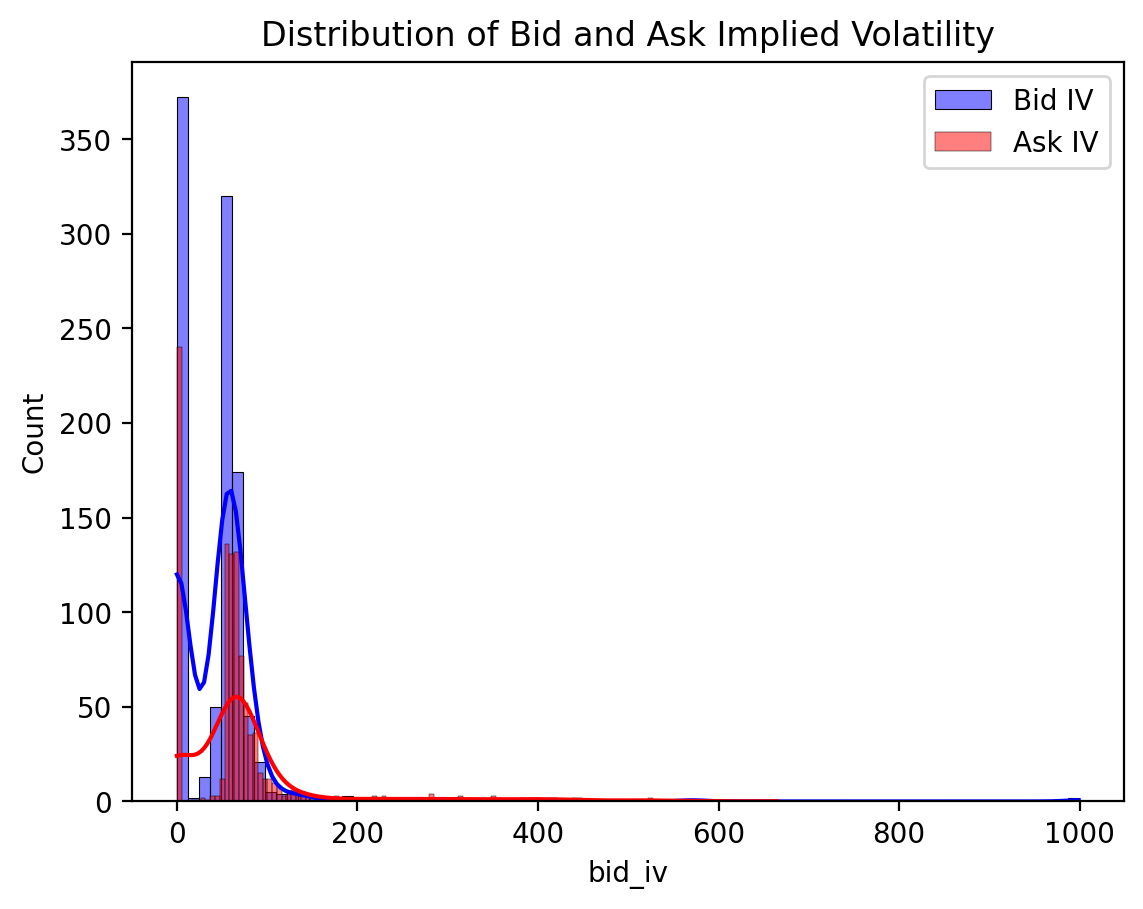

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['bid_iv'].dropna(), color='blue', label='Bid IV', kde=True)
sns.histplot(df['ask_iv'].dropna(), color='red', label='Ask IV', kde=True)
plt.legend()
plt.title('Distribution of Bid and Ask Implied Volatility')
plt.show()


The majority of Bid and Ask IV values are concentrated around lower figures, with a significant peak close to zero. This suggests that many options are perceived to have low volatility, but there is also a noticeable tail extending towards higher values.

In [182]:
median_bid_iv = df['bid_iv'].median()
median_ask_iv = df['ask_iv'].median()
print(f"Median Bid IV: {median_bid_iv}, Median Ask IV: {median_ask_iv}")


Median Bid IV: 52.49, Median Ask IV: 62.61


### Correlation 

In [183]:
import pandas as pd
import numpy as np

num_data = df.select_dtypes(include=['int64', 'float64'])
corr = num_data.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,best_bid_amount,best_ask_amount,bid_iv,ask_iv,underlying_price,mark_iv,best_bid_price,best_ask_price,open_interest,max_price,min_price,last_price,settlement_price,mark_price,index_price,change_id,timestamp,greeks.rho,greeks.theta,greeks.vega,greeks.gamma,greeks.delta,stats.volume_usd,stats.volume,stats.price_change,stats.low,stats.high
best_bid_amount,1.000000,0.272476,0.014303,-0.012266,0.035000,-0.055271,0.045644,0.085523,0.037540,0.014285,-0.005819,-0.009847,-0.004790,-0.016437,0.098149,0.039891,-0.120481,0.032859,-0.184140,-0.146730,0.042547,0.009282,0.015891,0.018062,-0.024712,0.087959,0.065796
best_ask_amount,0.272476,1.000000,0.003465,0.091037,0.181258,-0.184755,0.066956,0.201909,0.007163,0.053921,-0.044663,-0.064176,-0.015288,-0.031766,0.273837,0.074102,-0.341342,0.026620,-0.296474,-0.276634,0.120024,-0.155386,-0.011920,0.054270,-0.042382,-0.070840,-0.085488
bid_iv,0.014303,0.003465,1.000000,-0.119709,-0.057309,-0.136980,0.037218,-0.062176,0.056337,-0.150016,-0.147687,-0.097911,-0.180794,-0.158459,-0.014171,0.075250,-0.009293,0.088333,-0.080847,-0.026206,0.015901,0.124513,0.488019,0.554939,0.010880,-0.060571,0.035032
ask_iv,-0.012266,0.091037,-0.119709,1.000000,0.309506,0.308024,-0.027569,0.142615,0.034733,-0.167350,-0.121370,-0.125262,-0.134128,-0.132837,0.370072,0.088869,-0.403631,0.121421,0.140336,-0.348787,-0.098058,-0.039484,-0.068401,-0.055619,0.164729,-0.131904,-0.157736
underlying_price,0.035000,0.181258,-0.057309,0.309506,1.000000,0.086992,-0.249690,-0.213413,-0.129265,-0.018703,-0.150159,-0.141705,-0.115233,-0.151688,0.515538,-0.082030,-0.609357,0.042516,-0.275135,-0.295606,0.212260,-0.050788,0.094275,0.162441,0.073280,-0.165417,-0.146323
mark_iv,-0.055271,-0.184755,-0.136980,0.308024,0.086992,1.000000,0.013146,0.133329,-0.092277,0.163985,0.251884,0.242848,0.240057,0.247139,0.051339,0.072384,0.083151,-0.069776,0.225550,-0.031826,-0.439920,-0.082867,-0.047612,-0.165946,0.073207,0.214005,0.193776
best_bid_price,0.045644,0.066956,0.037218,-0.027569,-0.249690,0.013146,1.000000,0.667696,0.061253,0.459719,0.462955,0.470299,0.471664,0.485399,-0.209486,0.049985,0.251958,-0.350357,0.096953,0.102524,-0.079723,-0.145811,-0.000434,-0.048636,-0.030321,0.465939,0.440753
best_ask_price,0.085523,0.201909,-0.062176,0.142615,-0.213413,0.133329,0.667696,1.000000,0.063660,0.554733,0.588519,0.597465,0.602691,0.600266,-0.114934,0.057496,0.186460,-0.308558,0.159606,-0.015389,-0.113642,-0.182054,-0.017414,-0.059280,-0.023238,0.601369,0.556873
open_interest,0.037540,0.007163,0.056337,0.034733,-0.129265,-0.092277,0.061253,0.063660,1.000000,-0.136741,-0.057954,-0.082773,-0.083607,-0.074964,0.037024,0.061134,0.011756,0.071755,0.166319,-0.110722,-0.070184,0.016994,-0.027749,-0.019384,0.004982,-0.044217,-0.063534
max_price,0.014285,0.053921,-0.150016,-0.167350,-0.018703,0.163985,0.459719,0.554733,-0.136741,1.000000,0.919410,0.898500,0.954700,0.952194,-0.206003,-0.068936,0.249002,-0.723686,0.022440,0.117736,-0.046951,-0.399491,0.213001,-0.000971,-0.062834,0.897296,0.893327


In [187]:
btc_data = df

### Options Greeks Visualization

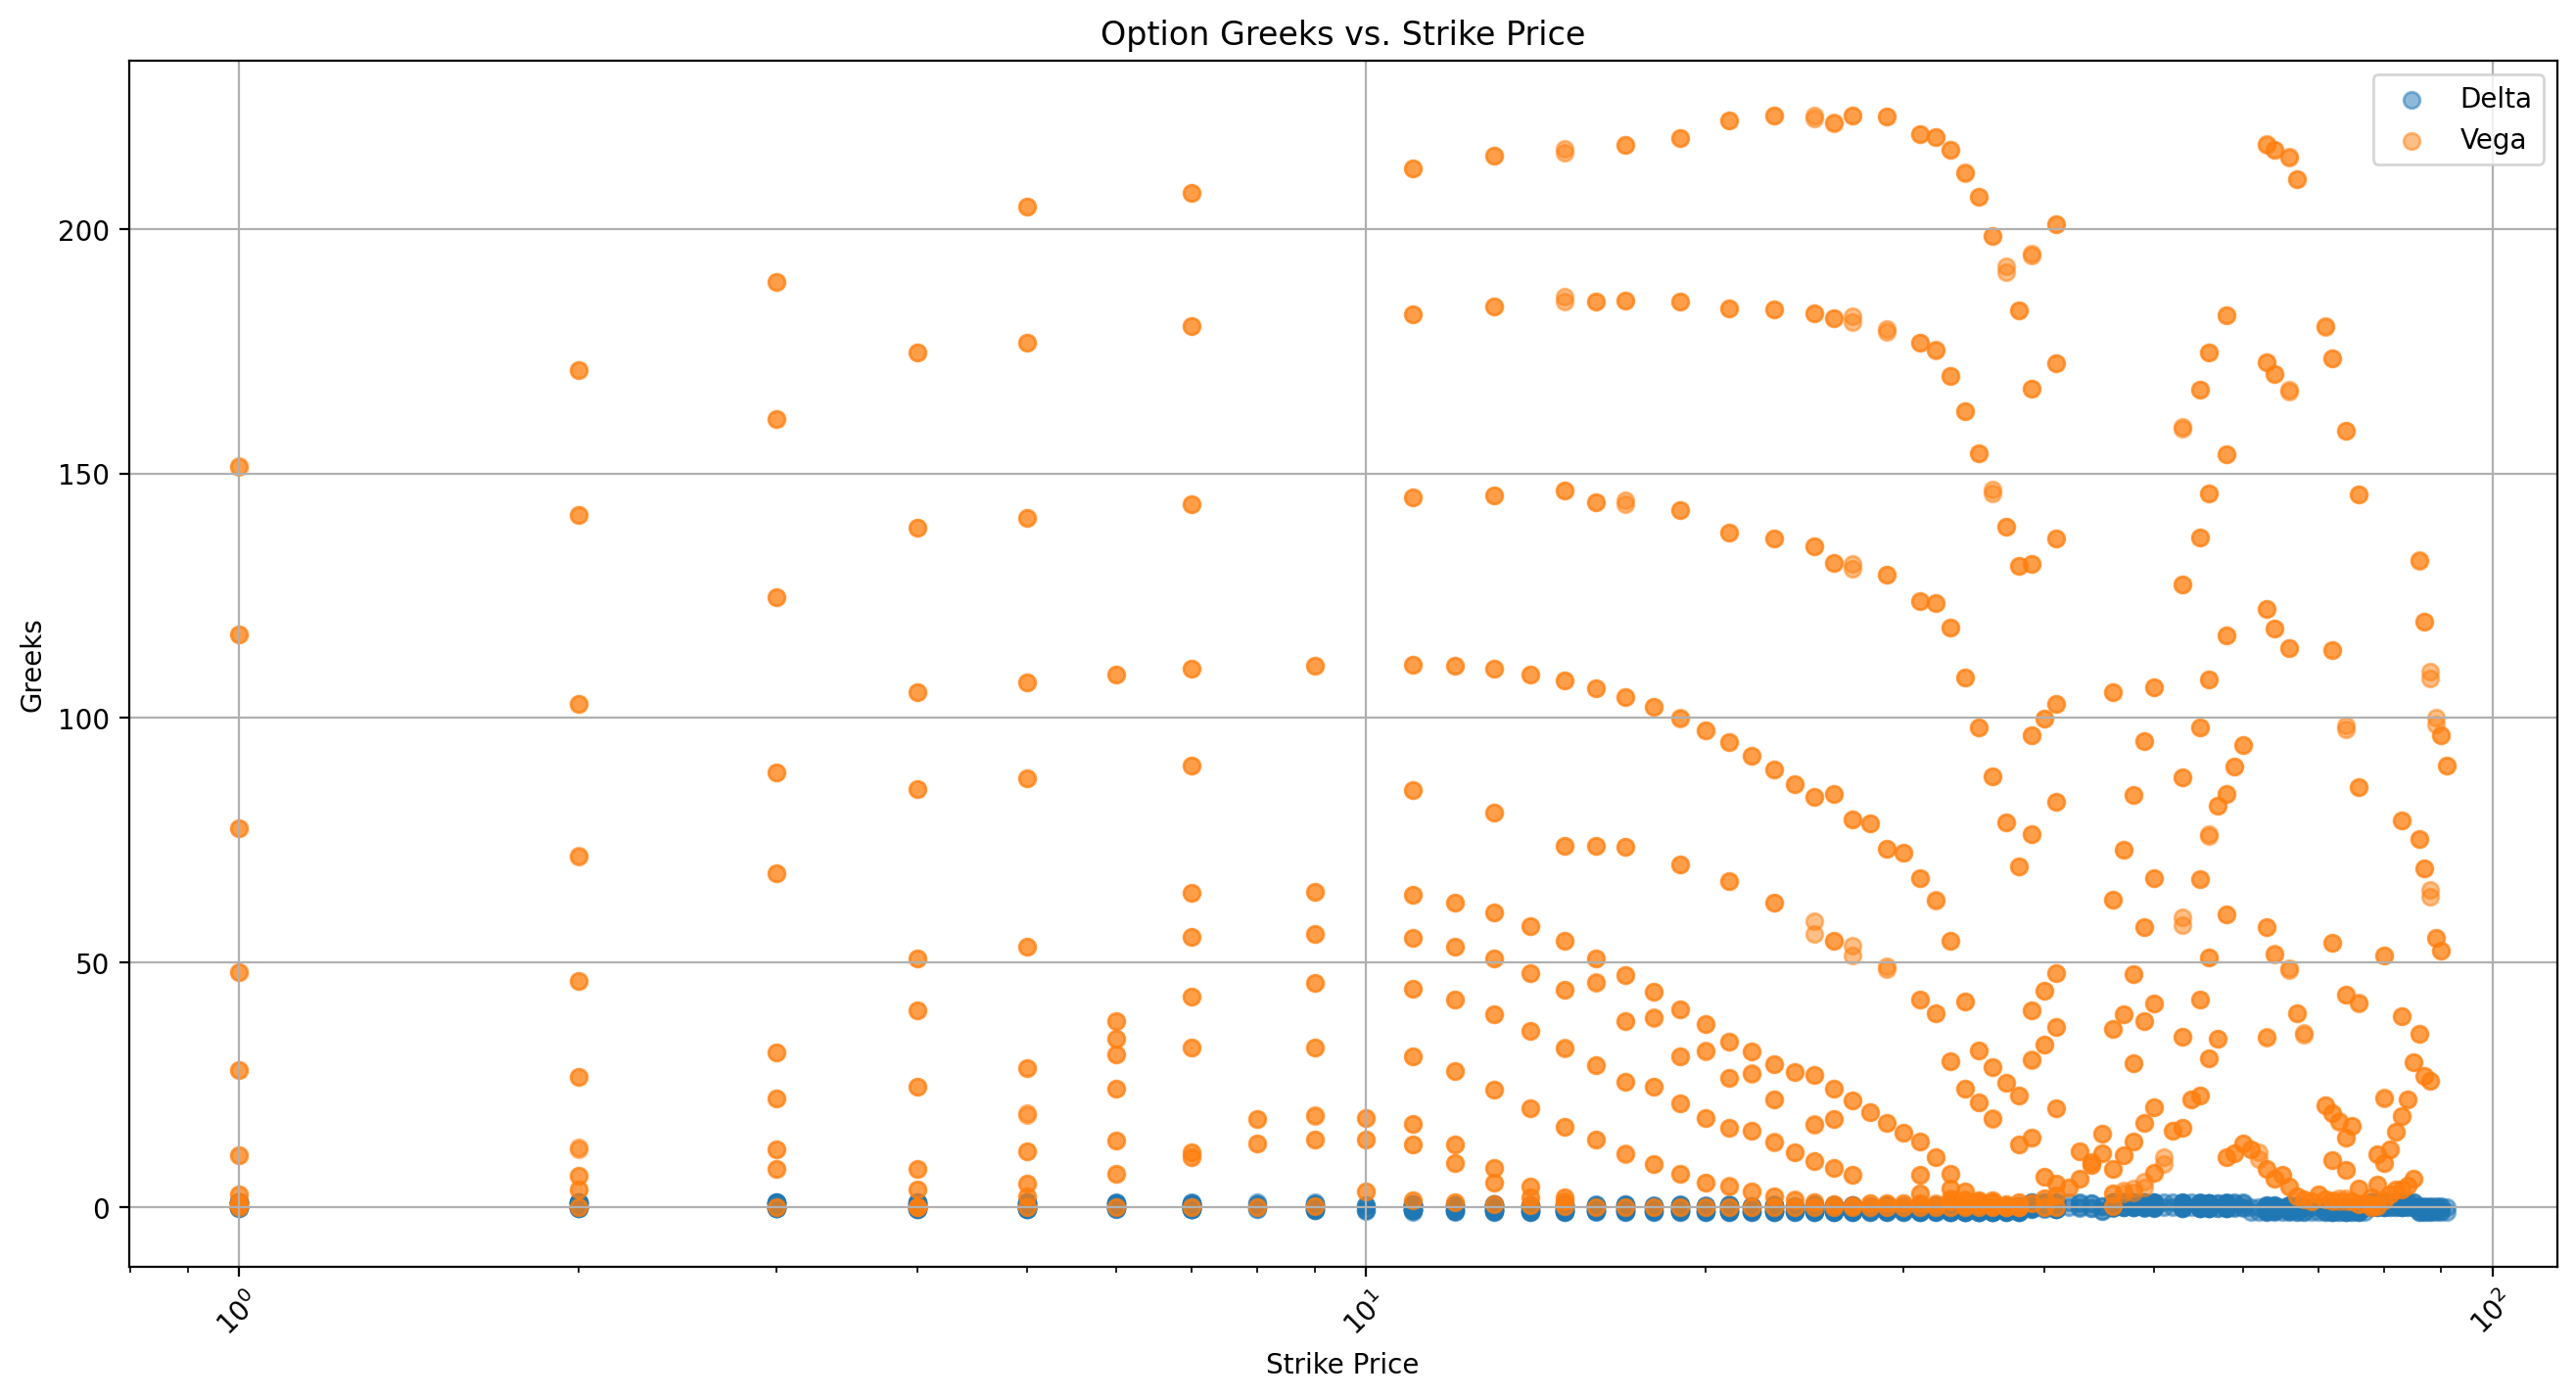

In [191]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))  # Larger figure size
plt.scatter(df['Strike Price'], df['greeks.delta'], label='Delta', alpha=0.5)
plt.scatter(df['Strike Price'], df['greeks.vega'], label='Vega', alpha=0.5)
plt.title('Option Greeks vs. Strike Price')
plt.xlabel('Strike Price')
plt.ylabel('Greeks')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.xscale('log')  # Optional: Only use if appropriate for your data range
plt.grid(True)  # Enable grid for better readability
plt.legend()
plt.show()


### Distribution of Returns

In [190]:
# Comparing theoretical and actual prices
btc_data['Theoretical_Price'] = btc_data.apply(lambda x: black_scholes_call(x['underlying_price'], x['Strike Price'], x['Time to Expiration'], 0.01, x['bid_iv']/100), axis=1)

plt.figure(figsize=(12, 6))
plt.plot(btc_data['Date'], btc_data['Theoretical_Price'], label='Theoretical Price')
plt.plot(btc_data['Date'], btc_data['Close'], label='Actual Market Price', alpha=0.6)
plt.title('Theoretical vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


TypeError: unsupported operand type(s) for /: 'float' and 'str'

In [195]:
import requests

def fetch_options_volume(instrument_name):
    url = f'https://www.deribit.com/api/v2/public/get_book_summary_by_instrument'
    params = {
        'instrument_name': instrument_name,
        'depth': 1  # You might adjust this based on how much data you need
    }
    response = requests.get(url, params=params)
    data = response.json()
    
    if 'result' in data:
        return data['result'][0]['volume']  # Returns the volume of the options
    else:
        raise Exception(f"Failed to fetch data: {data.get('error', 'Unknown Error')}")

# Example usage
instrument_name = 'BTC-25DEC20-50000-C'  # Replace with a valid instrument name
try:
    volume = fetch_options_volume(instrument_name)
    print(f"Volume for {instrument_name}: {volume}")
except Exception as e:
    print(str(e))


Failed to fetch data: {'message': 'Invalid params', 'data': {'param': 'instrument_name', 'reason': 'instrument is not open'}, 'code': -32602}


In [185]:
from datetime import datetime

# Assuming 'Expiration Date' is in 'DDMMMYY' format
df['Expiration Date'] = pd.to_datetime(df['Expiration Date'], format='%d%b%y')

# Calculate the time to expiration in years
df['Time to Expiration'] = (df['Expiration Date'] - datetime.now()).dt.days / 365

# Example to calculate one option price using Black-Scholes (use median_iv as placeholder for both bid and ask)
from scipy.stats import norm
import numpy as np

def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Select a sample option to price
sample_option = df.iloc[0]
S = sample_option['underlying_price']
K = sample_option['Strike Price']
T = sample_option['Time to Expiration']
r = 0.01  # Approximate risk-free rate
sigma = median_bid_iv / 100  # Convert percentage to decimal

call_price = black_scholes_call(S, K, T, r, sigma)
print(f"Calculated Black-Scholes Call Price: {call_price}")


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

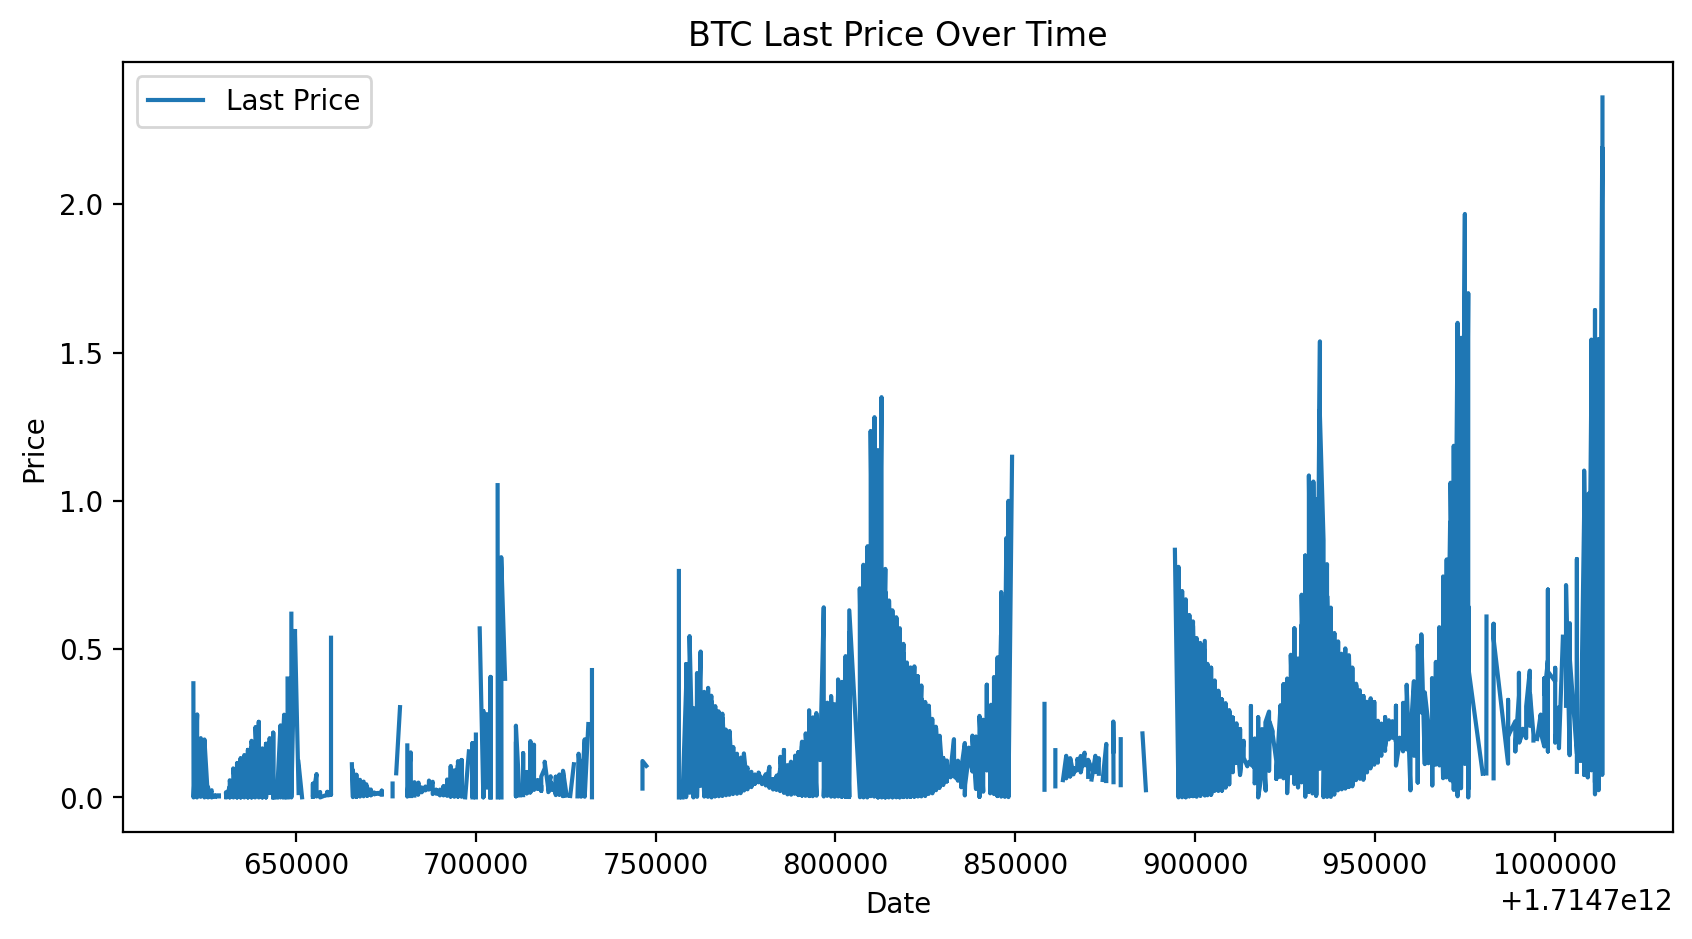

ValueError: could not convert string to float: 'BTC-3MAY24'

<Figure size 1000x800 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the closing price over time
plt.figure(figsize=(10, 5))
plt.plot(df['timestamp'], df['last_price'], label='Last Price')
plt.title('BTC Last Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


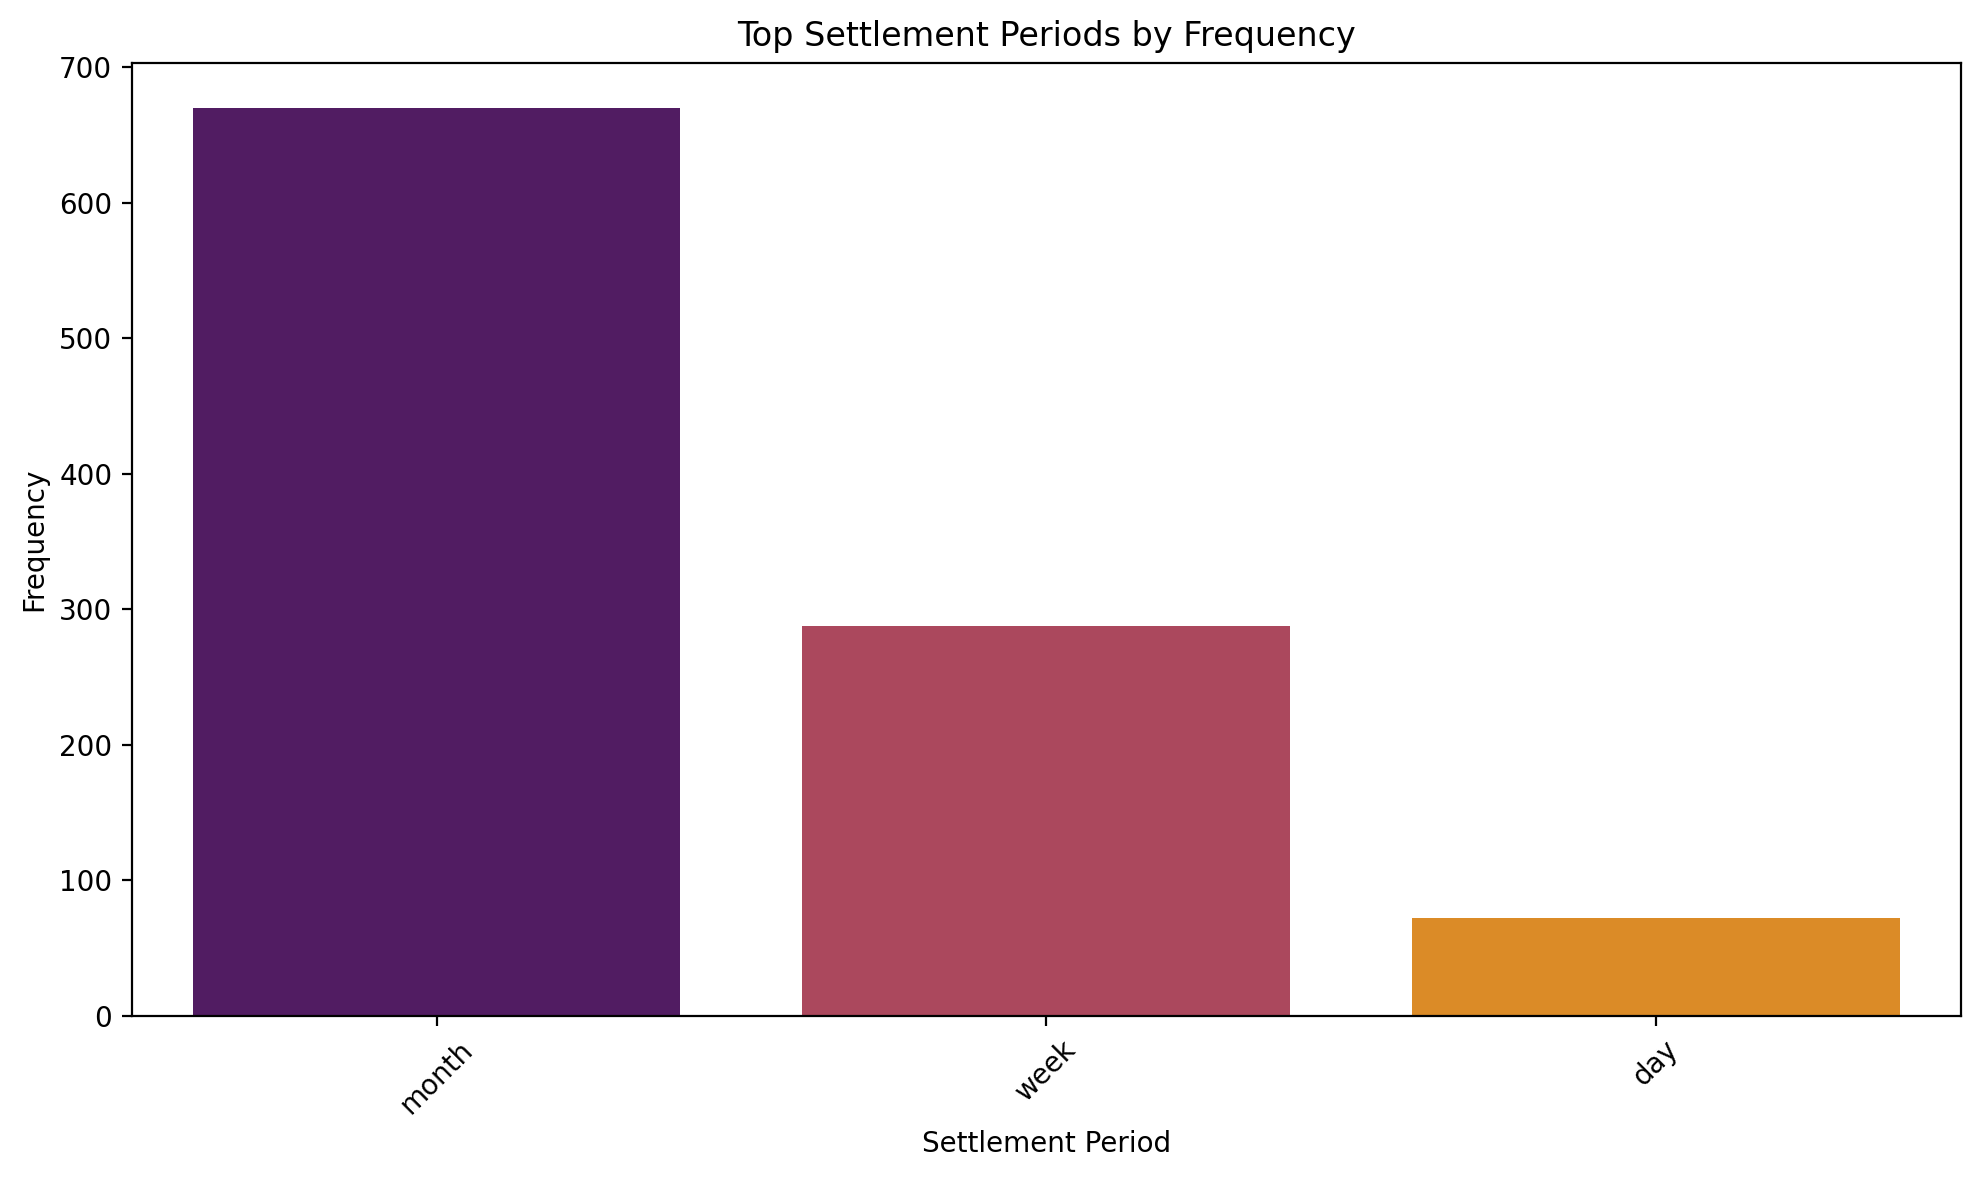

In [ ]:
# Compute the frequency of each unique settlement period
btc_settlement_freq = df['settlement_period'].value_counts().reset_index()
btc_settlement_freq.columns = ['settlement_period', 'Frequency']  # Renaming columns appropriately

# Creating a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='settlement_period', y='Frequency', data=btc_settlement_freq, palette="inferno")
plt.xticks(rotation=45)
plt.xlabel('Settlement Period')
plt.ylabel('Frequency')
plt.title('Top Settlement Periods by Frequency')
plt.tight_layout()
plt.show()

### Distribution 

In [ ]:
ir=df['interest_rate']
ir.describe()

count    1030.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: interest_rate, dtype: float64

## Correlation

In [ ]:
import pandas as pd
import numpy as np

num_data = df.select_dtypes(include=['int64', 'float64'])
corr = num_data.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,best_bid_amount,best_ask_amount,bid_iv,ask_iv,underlying_price,mark_iv,best_bid_price,best_ask_price,open_interest,max_price,min_price,last_price,settlement_price,mark_price,index_price,change_id,timestamp,greeks.rho,greeks.theta,greeks.vega,greeks.gamma,greeks.delta,stats.volume_usd,stats.volume,stats.price_change,stats.low,stats.high
best_bid_amount,1.000000,0.272543,0.014559,-0.011954,0.034158,-0.055853,0.045808,0.085703,0.037725,0.014612,-0.005632,-0.009563,-0.004528,-0.016192,0.097655,0.039849,-0.119664,0.032766,-0.184346,-0.146322,0.042671,0.009243,0.015931,0.018107,-0.024624,0.088392,0.066286
best_ask_amount,0.272543,1.000000,0.003644,0.091215,0.180338,-0.184907,0.067065,0.202010,0.007295,0.054128,-0.044528,-0.063962,-0.015114,-0.031592,0.273358,0.074072,-0.340396,0.026556,-0.296572,-0.276277,0.120102,-0.155406,-0.011891,0.054300,-0.042284,-0.070283,-0.084860
bid_iv,0.014559,0.003644,1.000000,-0.119055,-0.058624,-0.138004,0.037531,-0.061777,0.056681,-0.149284,-0.147279,-0.097303,-0.180109,-0.157930,-0.014961,0.075157,-0.008077,0.088139,-0.081310,-0.025548,0.016141,0.124410,0.487974,0.554886,0.011028,-0.059635,0.035974
ask_iv,-0.011954,0.091215,-0.119055,1.000000,0.307028,0.305881,-0.027171,0.142988,0.035149,-0.166477,-0.120897,-0.124477,-0.133431,-0.132225,0.368757,0.088751,-0.401486,0.121175,0.139656,-0.347766,-0.097729,-0.039555,-0.068284,-0.055495,0.164752,-0.130307,-0.155935
underlying_price,0.034158,0.180338,-0.058624,0.307028,1.000000,0.090441,-0.250090,-0.214028,-0.130046,-0.020514,-0.150854,-0.142954,-0.116553,-0.152672,0.516460,-0.081639,-0.610695,0.042923,-0.272998,-0.296734,0.211076,-0.050469,0.093844,0.161835,0.072596,-0.167070,-0.148294
mark_iv,-0.055853,-0.184907,-0.138004,0.305881,0.090441,1.000000,0.012272,0.132110,-0.093063,0.161993,0.250512,0.240849,0.238205,0.245483,0.053311,0.072454,0.079763,-0.069214,0.226428,-0.033428,-0.439793,-0.082540,-0.047736,-0.165896,0.072408,0.210313,0.189890
best_bid_price,0.045808,0.067065,0.037531,-0.027171,-0.250090,0.012272,1.000000,0.667777,0.061480,0.459902,0.463080,0.470482,0.471835,0.485546,-0.209857,0.049931,0.252356,-0.350421,0.096584,0.102894,-0.079548,-0.145842,-0.000382,-0.048572,-0.030210,0.466249,0.441105
best_ask_price,0.085703,0.202010,-0.061777,0.142988,-0.214028,0.132110,0.667777,1.000000,0.063920,0.554909,0.588629,0.597627,0.602842,0.600400,-0.115452,0.057432,0.187072,-0.308634,0.159160,-0.014894,-0.113433,-0.182082,-0.017352,-0.059204,-0.023118,0.601626,0.557184
open_interest,0.037725,0.007295,0.056681,0.035149,-0.130046,-0.093063,0.061480,0.063920,1.000000,-0.136198,-0.057678,-0.082254,-0.083174,-0.074600,0.036401,0.061071,0.012626,0.071618,0.165880,-0.110186,-0.069989,0.016939,-0.027687,-0.019316,0.005135,-0.043281,-0.062479
max_price,0.014612,0.054128,-0.149284,-0.166477,-0.020514,0.161993,0.459902,0.554909,-0.136198,1.000000,0.919373,0.898553,0.954717,0.952191,-0.206813,-0.069002,0.250077,-0.723589,0.021779,0.118461,-0.046615,-0.399419,0.213014,-0.000857,-0.062552,0.897261,0.893357
